# ENGR 1330 – Computational Thinking and Data Science

## Power consumption Final Project 

Power consumption in different zones in a city area can be affected by weather parameters, the landscape and the type of occupancy (residential/industrial etc). In this project, we will analyze the data of power consumtion for year 2017 in 3 different zones in a city named Tetuan in Morocco. We will find three best fitted data models to predict the power consumptions in the three different zones. 


## Objective(s):
- Literature scan on power consumption in city areas and how the atmospheric and landscape conditions affect total power consumption 
- Analyse an existing measurement dataset and build data models to predict power consumption in 3 different zones in a city. 

The measurements database is comprised of 7 columns:
1. DateTime
2. Temperature 
3. Humidity
4. Wind speed
5. Zone 1 power consumption
6. Zone 2 power consumption
7. Zone 3 power consumption
 
Temperature, humidity and Windspeed being the factors/inputs affecting the consumed powers (outputs) in the 3 different zones.  


- Build an interface to allow users to enter input parameters and return an estimated power consumption and (an assessment of the uncertainty in the estimate.)
- Build an interface to allow users to add observations to the underlying database, and automatically update the data model to incorporate the new observations

## Tasks: 

**Literature Research:**



**Exploratory Data Analysis**
- Describe the database. Include visualization of the database.
- Reformat as needed (column headings perhaps) the database for subsequent analysis.
- Create pairplots for all the columns except DateTime, make comments on your observation 
- Select possible data model structures (linear model, power-law, ...)
- Select possible data model "fitting" tools (ordinary least squares,lasso regression, decision trees, random forests, ...)

**Model Building**
- Build 3 different data models to fit the power consumption for the 3 zones. For each zone:
     - you should  determine which inputs strongly affect the power. 
     - Build at least 2 different models using different input factors
     - Assess data model quality (decide which model is best) including visualization tools (residual plot) 
- Build the input data interface for using the "best" model(s)
- Using the best model for each zone, determine projected power consumptions and an assessment of uncertainty for 3 weather conditions listed below:

|Temperature|Humidity|Windspeed|
|:---|:---|:---|
|12.5|71|0.073|
|21.8|85.2|0.068|
|17.9|54.0|0.083|
               
       
**Documentation**
- Training video on how to use your tool, and demonstrate the tool(s) as they are run
- Project management video 
- Interim report (see deliverables below); this document must be rendered as a .pdf, but you are free to use your favorite writing software (Word,LibreOffice, ...).
- Final Report (see deliverables below)

## Deliverables:

#### Part 1 (due December 1):
A report that briefly describes the project database and how you plan to solve the tasks of creating a suitable data model.  
- Break down each task into manageable subtasks and describe how you intend to solve the subtasks and how you will test each task. (Perhaps make a simple Gantt Chart)
- Address the responsibilities of each team member for tasks completed and tasks to be completed until the end of the semester. (Perhaps make explicit subtask assignments)


#### Part 2 (due Final Date):
- A well-documented JupyterLab (using a python kernel) analysis and implementation for the data models.
- A well-documented JupyterLab (using a python kernel) implementation for the data model user interface.
- A well-documented JupyterLab (using a python kernel) implementation for the database update interface.

**Above items can reside in a single notebook; but clearly identify sections that perform different tasks.**

- A project management video (up to 10 minutes) in which you explain how you completed the project and how you worked as a team. Also include demonstration of performance and description of problems that you were not able to solve.

**Above items can reside in a single video; but structure the video into the two parts; use an obvious transition when moving from "how to ..." into the project management portion.**  Keep the total video length within 10 minutes; submit as an *unlisted* YouTube video, and just supply the link (someone on each team is likely to have a YouTube creator account).  Keep in mind a 10 minute video can approach 100MB file size before compression, so it won't upload to Blackboard and cannot be emailed.

In [285]:
import random 
random.seed(123)
import warnings
warnings.filterwarnings(action="ignore")

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn
from sklearn import linear_model as lm

from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
import operator as op

from sklearn.impute import SimpleImputer

import seaborn as sns
sns.set(rc={'figure.figsize': (12,8)})

import os


In [286]:
df = pd.read_csv('Tetuan City power consumption.csv')
df

DateTime  Temperature  Humidity  Wind Speed  \
0         1/1/17 0:00        6.559      73.8       0.083   
1         1/1/17 0:10        6.414      74.5       0.083   
2         1/1/17 0:20        6.313      74.5       0.080   
3         1/1/17 0:30        6.121      75.0       0.083   
4         1/1/17 0:40        5.921      75.7       0.081   
...               ...          ...       ...         ...   
52411  12/30/17 23:10        7.010      72.4       0.080   
52412  12/30/17 23:20        6.947      72.6       0.082   
52413  12/30/17 23:30        6.900      72.8       0.086   
52414  12/30/17 23:40        6.758      73.0       0.080   
52415  12/30/17 23:50        6.580      74.1       0.081   

       Zone 1 Power Consumption  Zone 2 Power Consumption  \
0                   34055.69620               16128.87538   
1                   29814.68354               19375.07599   
2                   29128.10127               19006.68693   
3                   28228.86076               18361.09422   
4                   27335.69620               17872.34043   
...                         ...                       ...   
52411               31160.45627               26857.31820   
52412               30430.41825               26124.57809   
52413               29590.87452               25277.69254   
52414               28958.17490               24692.23688   
52415               28349.80989               24055.23167   

       Zone 3 Power Consumption  
0                   20240.96386  
1                   20131.08434  
2                   19668.43373  
3                   18899.27711  
4                   18442.40964  
...                         ...  
52411               14780.31212  
52412               14428.81152  
52413               13806.48259  
52414               13512.60504  
52415               13345.49820  

[52416 rows x 7 columns]

In [287]:
df.columns = df.columns.str.replace(' ','_')
df

DateTime  Temperature  Humidity  Wind_Speed  \
0         1/1/17 0:00        6.559      73.8       0.083   
1         1/1/17 0:10        6.414      74.5       0.083   
2         1/1/17 0:20        6.313      74.5       0.080   
3         1/1/17 0:30        6.121      75.0       0.083   
4         1/1/17 0:40        5.921      75.7       0.081   
...               ...          ...       ...         ...   
52411  12/30/17 23:10        7.010      72.4       0.080   
52412  12/30/17 23:20        6.947      72.6       0.082   
52413  12/30/17 23:30        6.900      72.8       0.086   
52414  12/30/17 23:40        6.758      73.0       0.080   
52415  12/30/17 23:50        6.580      74.1       0.081   

       Zone_1_Power_Consumption  Zone_2_Power_Consumption  \
0                   34055.69620               16128.87538   
1                   29814.68354               19375.07599   
2                   29128.10127               19006.68693   
3                   28228.86076               18361.09422   
4                   27335.69620               17872.34043   
...                         ...                       ...   
52411               31160.45627               26857.31820   
52412               30430.41825               26124.57809   
52413               29590.87452               25277.69254   
52414               28958.17490               24692.23688   
52415               28349.80989               24055.23167   

       Zone_3_Power_Consumption  
0                   20240.96386  
1                   20131.08434  
2                   19668.43373  
3                   18899.27711  
4                   18442.40964  
...                         ...  
52411               14780.31212  
52412               14428.81152  
52413               13806.48259  
52414               13512.60504  
52415               13345.49820  

[52416 rows x 7 columns]

In [288]:
df.describe()

Temperature      Humidity    Wind_Speed  Zone_1_Power_Consumption  \
count  52416.000000  52416.000000  52416.000000              52416.000000   
mean      18.810024     68.259518      1.959489              32344.970564   
std        5.815476     15.551177      2.348862               7130.562564   
min        3.247000     11.340000      0.050000              13895.696200   
25%       14.410000     58.310000      0.078000              26310.668692   
50%       18.780000     69.860000      0.086000              32265.920340   
75%       22.890000     81.400000      4.915000              37309.018185   
max       40.010000     94.800000      6.483000              52204.395120   

       Zone_2_Power_Consumption  Zone_3_Power_Consumption  
count              52416.000000              52416.000000  
mean               21042.509082              17835.406218  
std                 5201.465892               6622.165099  
min                 8560.081466               5935.174070  
25%                16980.766032              13129.326630  
50%                20823.168405              16415.117470  
75%                24713.717520              21624.100420  
max                37408.860760              47598.326360

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DateTime                  52416 non-null  object 
 1   Temperature               52416 non-null  float64
 2   Humidity                  52416 non-null  float64
 3   Wind_Speed                52416 non-null  float64
 4   Zone_1_Power_Consumption  52416 non-null  float64
 5   Zone_2_Power_Consumption  52416 non-null  float64
 6   Zone_3_Power_Consumption  52416 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.8+ MB


In [290]:
df.isnull().sum() 
#Checking if our dataframe has null values

DateTime                    0
Temperature                 0
Humidity                    0
Wind_Speed                  0
Zone_1_Power_Consumption    0
Zone_2_Power_Consumption    0
Zone_3_Power_Consumption    0
dtype: int64

In [291]:
df.corr(method = 'pearson')

Temperature  Humidity  Wind_Speed  \
Temperature                  1.000000 -0.460243    0.477109   
Humidity                    -0.460243  1.000000   -0.135853   
Wind_Speed                   0.477109 -0.135853    1.000000   
Zone_1_Power_Consumption     0.440221 -0.287421    0.167444   
Zone_2_Power_Consumption     0.382428 -0.294961    0.146413   
Zone_3_Power_Consumption     0.489527 -0.233022    0.278641   

                          Zone_1_Power_Consumption  Zone_2_Power_Consumption  \
Temperature                               0.440221                  0.382428   
Humidity                                 -0.287421                 -0.294961   
Wind_Speed                                0.167444                  0.146413   
Zone_1_Power_Consumption                  1.000000                  0.834519   
Zone_2_Power_Consumption                  0.834519                  1.000000   
Zone_3_Power_Consumption                  0.750733                  0.570932   

                          Zone_3_Power_Consumption  
Temperature                               0.489527  
Humidity                                 -0.233022  
Wind_Speed                                0.278641  
Zone_1_Power_Consumption                  0.750733  
Zone_2_Power_Consumption                  0.570932  
Zone_3_Power_Consumption                  1.000000

<Figure size 1200x800 with 0 Axes>

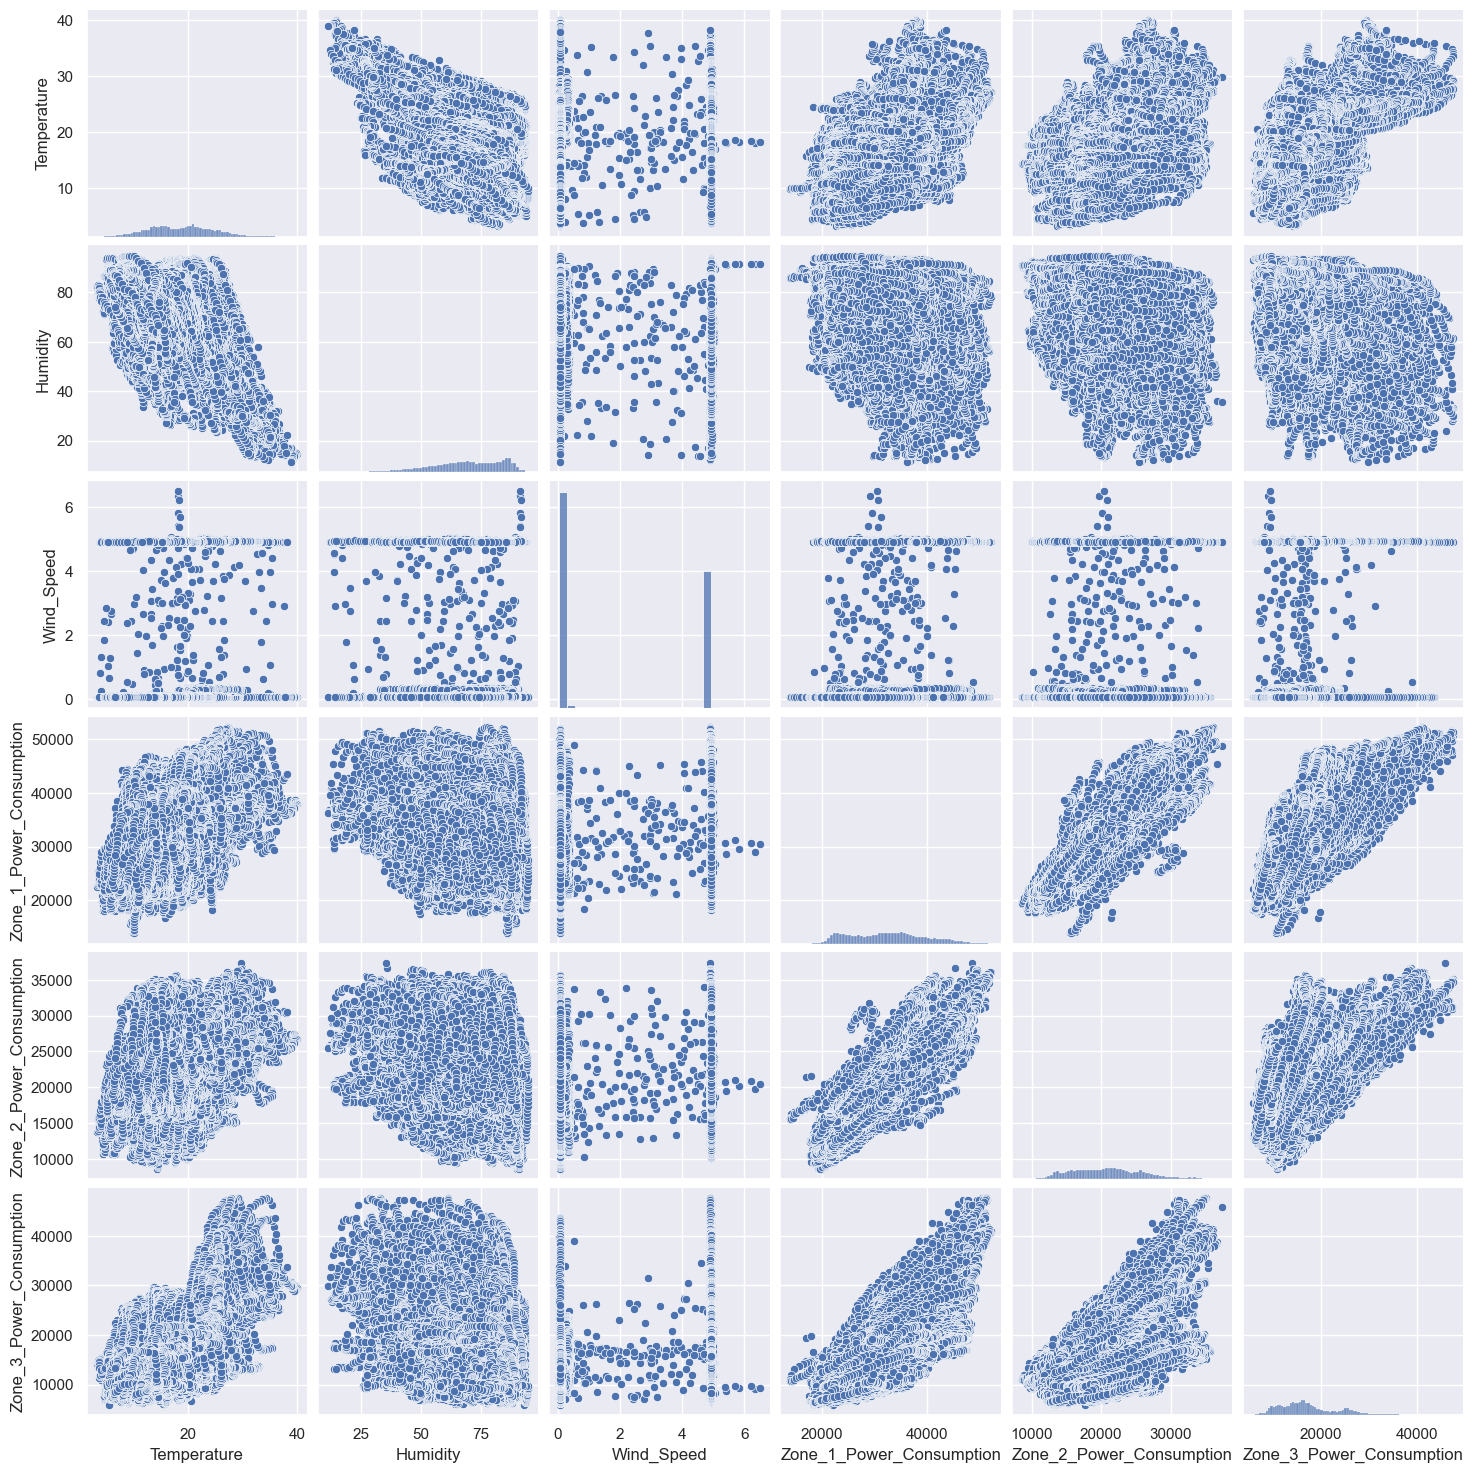

In [292]:
plt.figure()
sns.pairplot(df[1:])
plt.show()

#### Comments about our observation: ####
- The power consumption of all zones tends to be increased exponetially by the temperature
- The humidity seems to decrease the power consumption of the three zones
- Wind speed has the lowest effect in increasing power consumption among the three weather conditions 
- The wind speed affects the power consumption quadratically in zone 3
- The temperature has the strongest effect in power consumption among all three parameters

Possible data model structures
- LINEAR: Temperature vs zone 1,2
- EXPONENTIAL: Temperature vs zone 3
- QUADRATIC: Wind speed vs zone 3
- NEGATIVE EXPONENTIAL: humidity vs zone 1,2

Possible data model "fitting" tools: polynomial regression, method of least squares, lasso regression, decision trees, extra trees regressor, random forest regressor, CatBoost Regressor

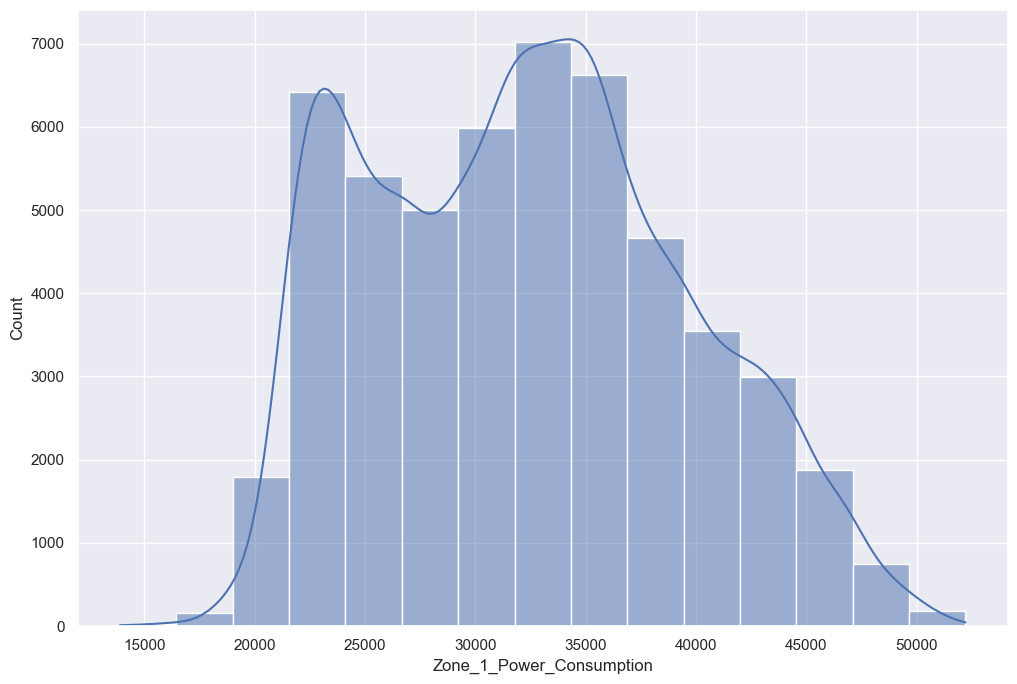

In [293]:
# Distribution of the observed variables in zone 1
sns.histplot(data=df, x='Zone_1_Power_Consumption', bins=15, kde=True)
plt.show()

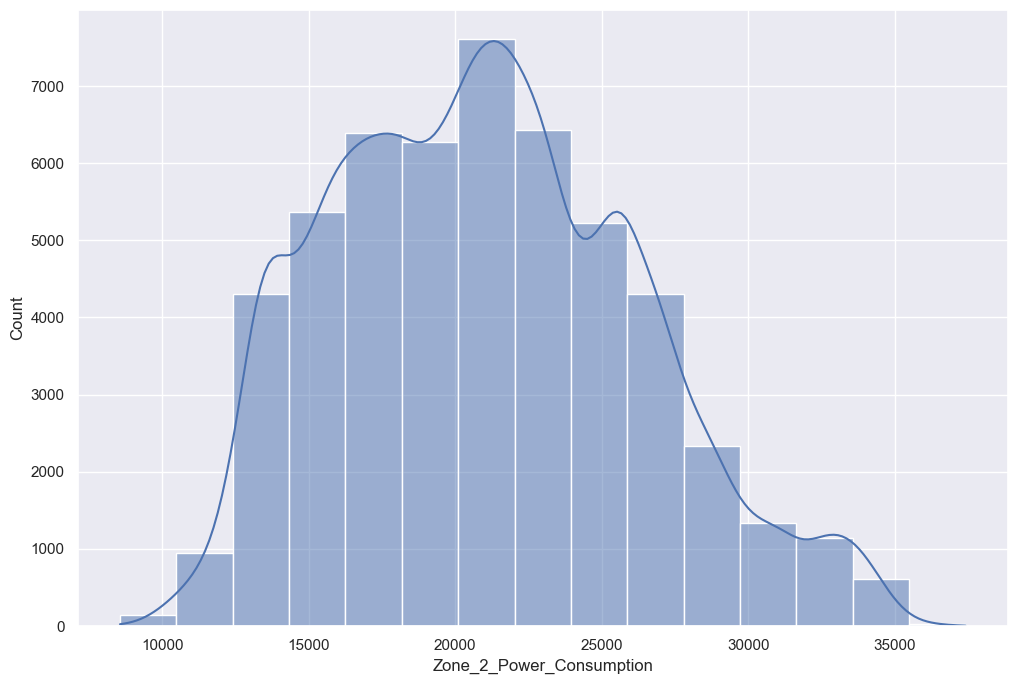

In [294]:
# Distribution of the observed variables in zone 2
sns.histplot(data=df, x='Zone_2_Power_Consumption', bins=15, kde=True)
plt.show()

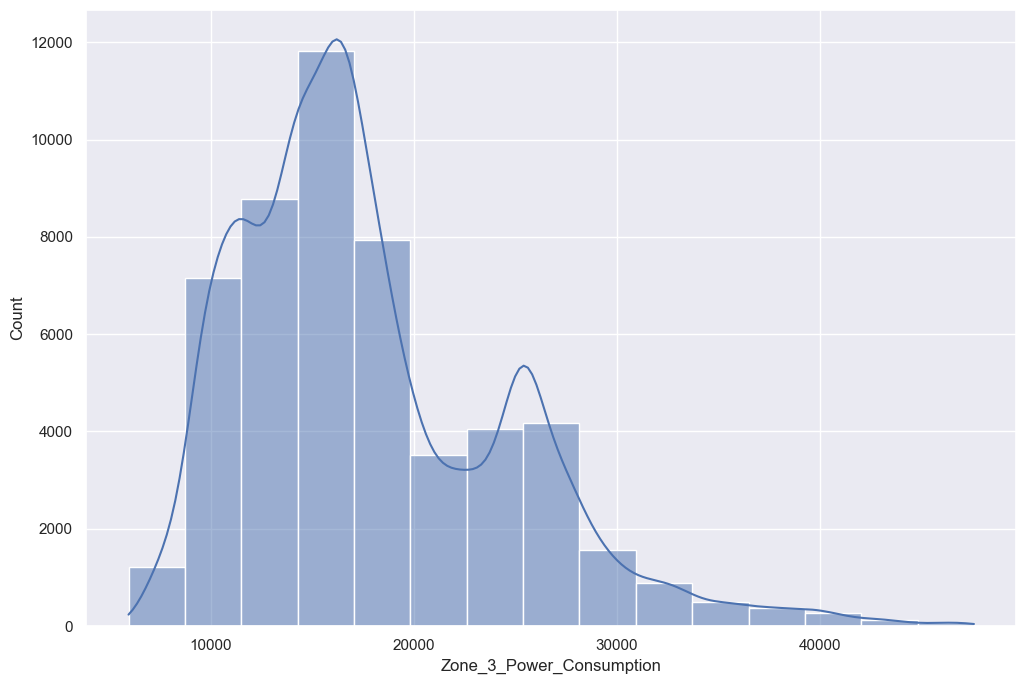

In [295]:
# Distribution of the observed variables in zone 3
sns.histplot(data=df, x='Zone_3_Power_Consumption', bins=15, kde=True)
plt.show()

## ZONE 1 ##

The inputs that strongly affect the power in zone 1 are temperature and humidity.

###  Models building ###

In [296]:
models = {}

###  1. Multiple Linear Regression ###

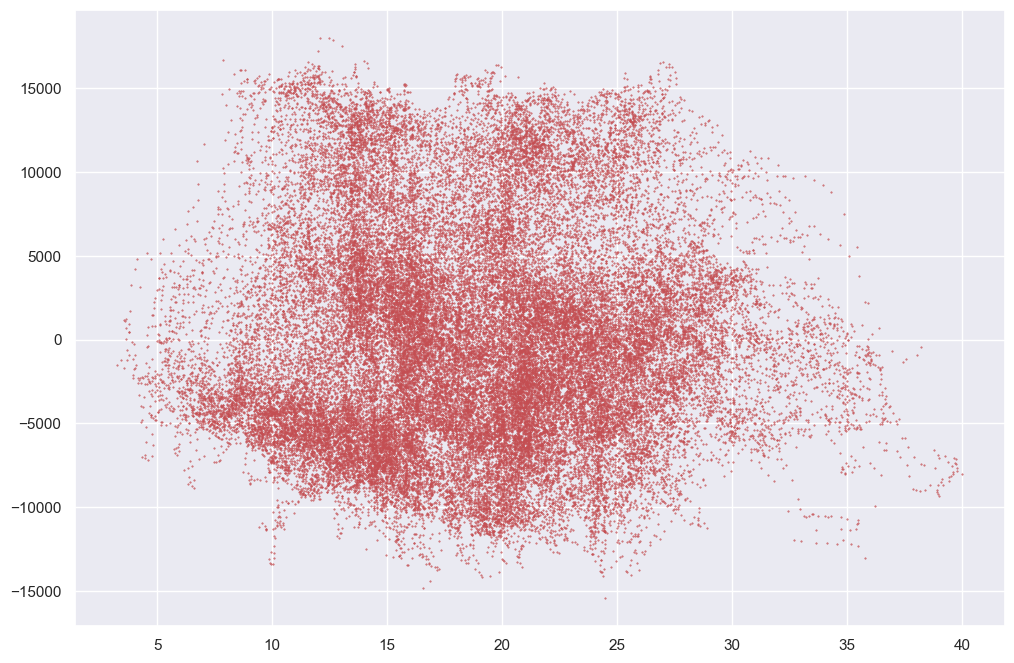

In [297]:
class linmodel():
    def __init__(self, df, target):
        self.df = df
        self.target = target

    def pre_processing(self):
        cat = ['DateTime', 'Zone_1_Power_Consumption','Zone_2_Power_Consumption','Zone_3_Power_Consumption']
        X = self.df.drop(cat+[self.target], axis=1).values
        Y = self.df[self.target].values

        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(X, Y, 
                                                            test_size = 0.333333, 
                                                            random_state = 2)
        return self

    def fit_pred_acc(self):
        reg = LinearRegression()
        reg.fit(self.X_train, self.Y_train)
        pred = reg.predict(self.X_test)
        rmse = round(skm.mean_squared_error(self.Y_test, pred, squared=False), 2)

        return [rmse]
    
    def residual_plot1(self):
        cat = ['DateTime', 'Zone_1_Power_Consumption','Zone_2_Power_Consumption','Zone_3_Power_Consumption']
        X = self.df.drop(cat+[self.target], axis=1).values
        Y = self.df[self.target].values
        
        model = lm.LinearRegression()
        fit_model = model.fit(X,Y)
        predicted = fit_model.predict(X)
        residual = Y - predicted
        
        return residual
    
lin1 = linmodel(df, 'Zone_1_Power_Consumption')
lin1_plot = lin1.residual_plot1()
lin1 = lin1.pre_processing()
models["Mult. Reg"] = lin1.fit_pred_acc()

plt.figure()
plt.scatter(df["Temperature"],lin1_plot,c="r",s=0.2)

###  2. Polynomial Regression ###

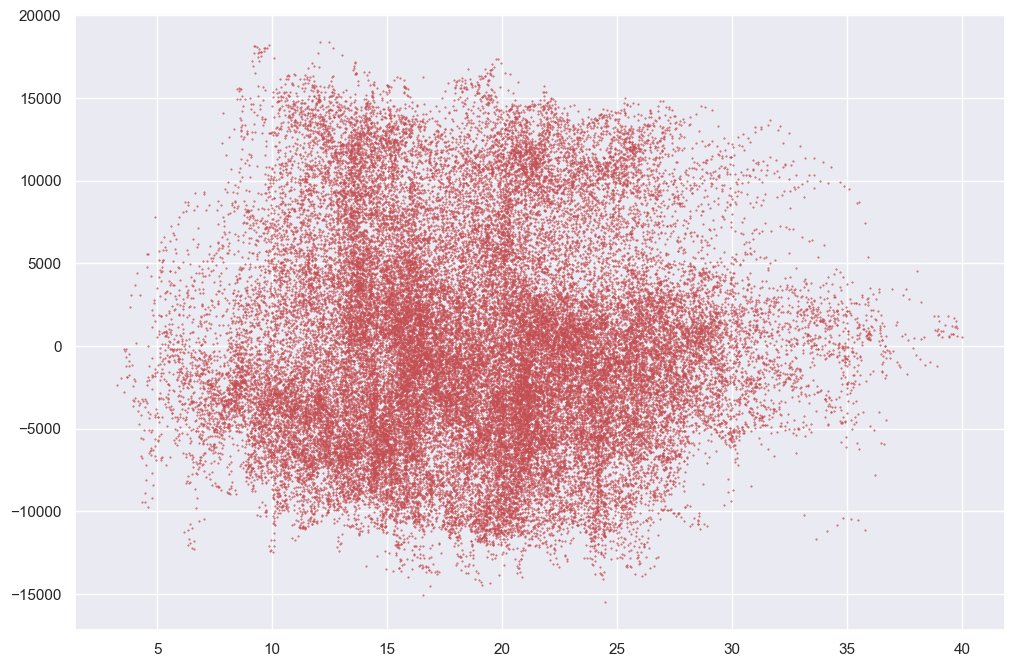

In [298]:
class polymodel():
    def __init__(self, df, target):
        self.df = df
        self.target = target

    def pre_processing(self):
        cat = ['DateTime', 'Zone_1_Power_Consumption','Zone_2_Power_Consumption','Zone_3_Power_Consumption']
        X = self.df.drop(cat+[self.target], axis=1).values
        Y = self.df[self.target].values

        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(X, Y, 
                                                            test_size = 0.333333, 
                                                            random_state = 42)
        return self

    def fit_pred_acc(self):
        reg = LinearRegression(normalize=True)
        pol_feat = PolynomialFeatures(2)
        X_train_transf = pol_feat.fit_transform(self.X_train)
        X_test_transf = pol_feat.fit_transform(self.X_test)
        model = reg.fit(X_train_transf, self.Y_train)
        pred = model.predict(X_test_transf)
        rmse = round(skm.mean_squared_error(self.Y_test, pred, squared=False), 2)
      
        return [rmse]
    
    def residual_plot2(self):
        cat = ['DateTime', 'Zone_1_Power_Consumption','Zone_2_Power_Consumption','Zone_3_Power_Consumption']
        X = self.df.drop(cat+[self.target], axis=1).values
        Y = self.df[self.target].values
        
        poly = PolynomialFeatures(degree=2,include_bias=False)
        poly_features = poly.fit_transform(X)
        model = lm.LinearRegression()
        fit_model = model.fit(poly_features,Y)
        predicted = fit_model.predict(poly_features)
        residual = Y - predicted
        
        return residual

poly1 = polymodel(df, 'Zone_1_Power_Consumption')
poly1_plot = poly1.residual_plot2()
poly1 = poly1.pre_processing()
models["Poly Reg"] = poly1.fit_pred_acc()

plt.figure()
plt.scatter(df["Temperature"],poly1_plot,c="r",s=0.2)


### 3. Random Forest Regressor ###

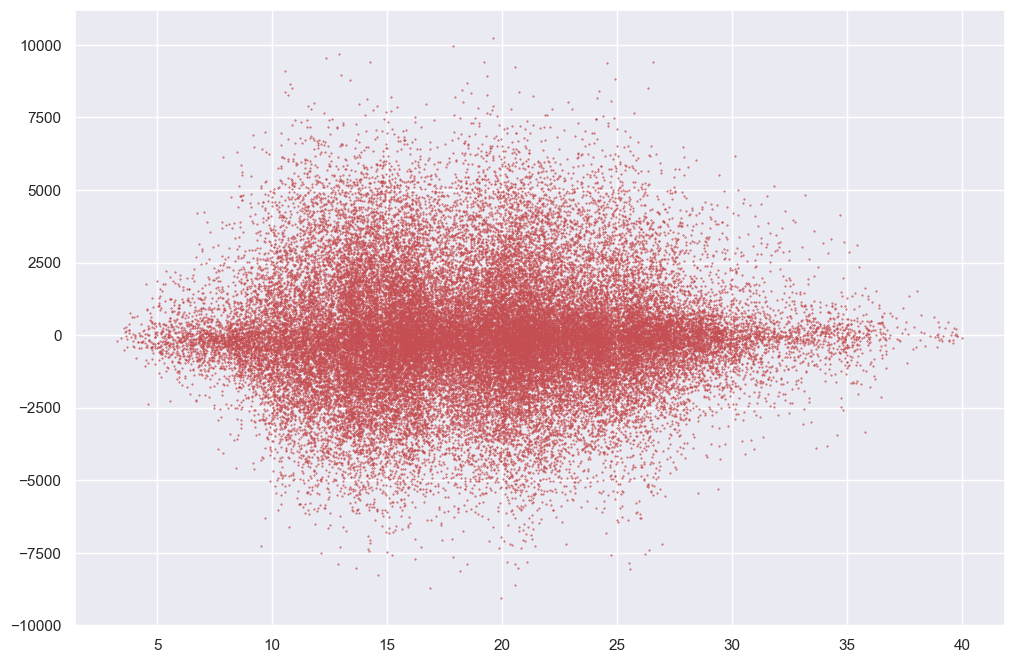

In [299]:
class randomforestmodel():
    def __init__(self, df, target):
        self.df = df
        self.target = target

    def pre_processing(self):
        cat = ['DateTime', 'Zone_1_Power_Consumption','Zone_2_Power_Consumption','Zone_3_Power_Consumption']
        X = self.df.drop(cat+[self.target], axis=1).values
        Y = self.df[self.target].values

        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(X, Y, 
                                                            test_size = 0.333333, 
                                                            random_state = 42)
        return self

    def fit_pred_acc(self):
        reg = RandomForestRegressor(max_depth=2)
        pol_feat = PolynomialFeatures(2)
        X_train_transf = pol_feat.fit_transform(self.X_train)
        X_test_transf = pol_feat.fit_transform(self.X_test)
        model = reg.fit(X_train_transf, self.Y_train)
        pred = model.predict(X_test_transf)
        rmse = round(skm.mean_squared_error(self.Y_test, pred, squared=False), 2)

        return [rmse]
    
    def residual_plot3(self):
        cat = ['DateTime', 'Zone_1_Power_Consumption','Zone_2_Power_Consumption','Zone_3_Power_Consumption']
        X = self.df.drop(cat+[self.target], axis=1).values
        Y = self.df[self.target].values
        
        ranforest = RandomForestRegressor(max_depth=2)
        model = en.RandomForestRegressor()
        fit_model = model.fit(X,Y)
        predicted = fit_model.predict(X)
        residual = Y - predicted
        
        return residual
    
rand1 = randomforestmodel(df, 'Zone_1_Power_Consumption')
rand1_plot = rand1.residual_plot3()
rand1 = rand1.pre_processing()
models["Random Forest Reg"] = rand1.fit_pred_acc()


plt.figure()
plt.scatter(df["Temperature"],rand1_plot,c="r",s=0.2)

### 4. Lasso Regression ###

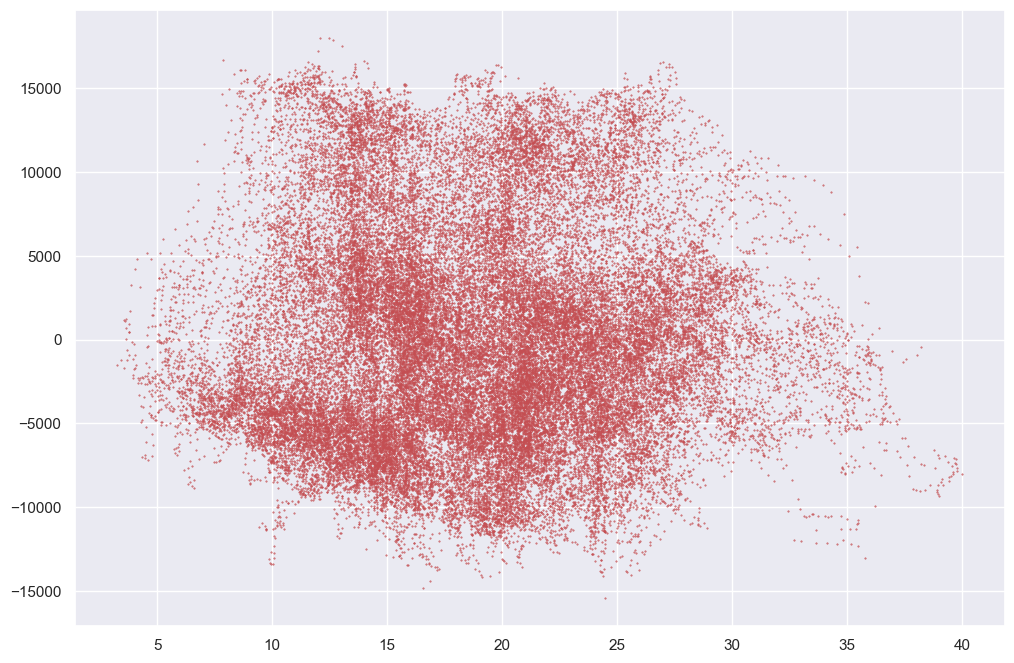

In [300]:
class lasmodel():
    def __init__(self, df, target):
        self.df = df
        self.target = target

    def pre_processing(self):
        cat = ['DateTime', 'Zone_1_Power_Consumption','Zone_2_Power_Consumption','Zone_3_Power_Consumption']
        X = self.df.drop(cat+[self.target], axis=1).values
        Y = self.df[self.target].values

        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(X, Y, 
                                                            test_size = 0.333333, 
                                                            random_state = 72)
        return self

    def fit_pred_acc(self):
        reg = Lasso()
        reg.fit(self.X_train, self.Y_train)
        pred = reg.predict(self.X_test)
        rmse = round(skm.mean_squared_error(self.Y_test, pred, squared=False), 2)
    
        return [rmse]
    
    def residual_plot4(self):
        cat = ['DateTime', 'Zone_1_Power_Consumption','Zone_2_Power_Consumption','Zone_3_Power_Consumption']
        X = self.df.drop(cat+[self.target], axis=1).values
        Y = self.df[self.target].values
        
        model = lm.Lasso()
        fit_model = model.fit(X,Y)
        predicted = fit_model.predict(X)
        residual = Y - predicted
        
        return residual
    
las1 = lasmodel(df, 'Zone_1_Power_Consumption')
las1_plot = las1.residual_plot4()
las1 = las1.pre_processing()
models["Lasso Reg"] = las1.fit_pred_acc()

plt.figure()
plt.scatter(df["Temperature"],las1_plot,c="r",s=0.2)

### 5. Ridge Regression ###

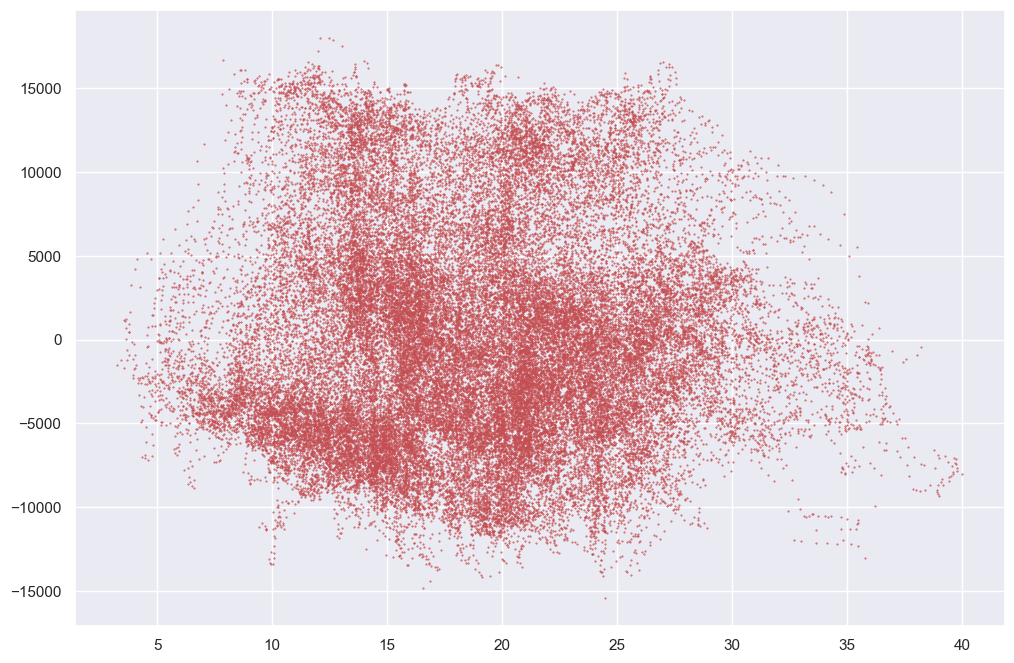

In [301]:
class rdgmodel():
    def __init__(self, df, target):
        self.df = df
        self.target = target

    def pre_processing(self):
        cat = ['DateTime', 'Zone_1_Power_Consumption','Zone_2_Power_Consumption','Zone_3_Power_Consumption']
        X = self.df.drop(cat+[self.target], axis=1).values
        Y = self.df[self.target].values
        
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(X, Y, 
                                                            test_size = 0.333333, 
                                                            random_state = 2)
        return self

    def fit_pred_acc(self):
        reg = Ridge(alpha=0.0001, normalize=True)
        reg.fit(self.X_train, self.Y_train)
        pred = reg.predict(self.X_test)
        rmse = round(skm.mean_squared_error(self.Y_test, pred, squared=False), 2)
    
        return [rmse]
    
    def residual_plot5(self):
        cat = ['DateTime', 'Zone_1_Power_Consumption','Zone_2_Power_Consumption','Zone_3_Power_Consumption']
        X = self.df.drop(cat+[self.target], axis=1).values
        Y = self.df[self.target].values
        
        model = Ridge(alpha=0.0001, normalize=True)
        fit_model = model.fit(X,Y)
        predicted = fit_model.predict(X)
        residual = Y - predicted
        
        return residual
    
rdg1 = rdgmodel(df, 'Zone_1_Power_Consumption')
rdg1_plot = rdg1.residual_plot5()
rdg1 = rdg1.pre_processing()
models["Ridge Reg"] = rdg1.fit_pred_acc()

plt.figure()
plt.scatter(df["Temperature"],rdg1_plot,c="r",s=0.2)

In [302]:
models_df1 = pd.DataFrame.from_dict(models, orient='index',
                  columns=['RMSE'])
models_df1.sort_values(by=['RMSE'])

RMSE
Poly Reg           6267.23
Lasso Reg          6344.95
Mult. Reg          6352.67
Ridge Reg          6352.67
Random Forest Reg  6383.12

## ZONE 2 ##

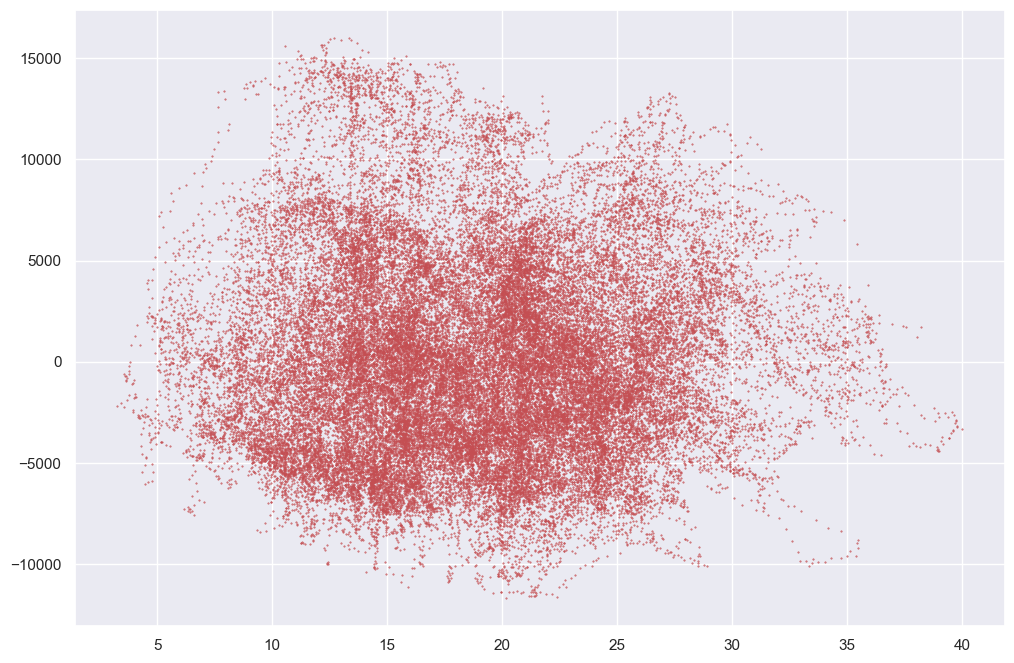

In [303]:
lin2 = linmodel(df, 'Zone_2_Power_Consumption')
lin2_plot = lin2.residual_plot1()
lin2 = lin2.pre_processing()
models["Mult. Reg"] = lin2.fit_pred_acc()

plt.figure()
plt.scatter(df["Temperature"],lin2_plot,c="r",s=0.2)

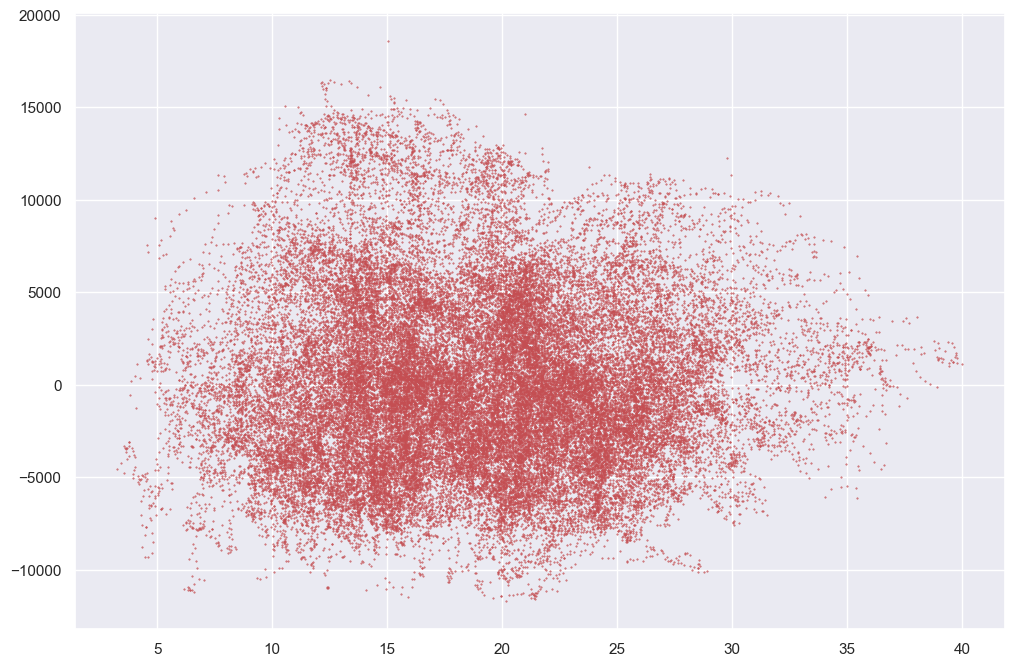

In [304]:
poly2 = polymodel(df, 'Zone_2_Power_Consumption')
poly2_plot = poly2.residual_plot2()
poly2 = poly2.pre_processing()
models["Poly Reg"] = poly2.fit_pred_acc()

plt.figure()
plt.scatter(df["Temperature"],poly2_plot,c="r",s=0.2)


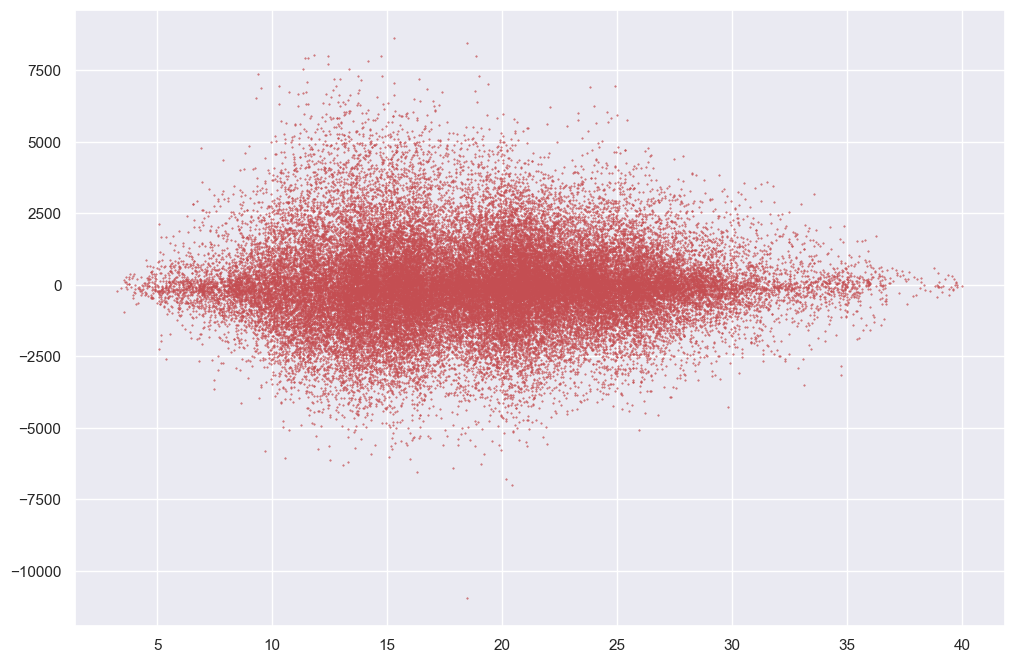

In [305]:
rand2 = randomforestmodel(df, 'Zone_2_Power_Consumption')
rand2_plot = rand2.residual_plot3()
rand2 = rand2.pre_processing()
models["Random Forest Reg"] = rand2.fit_pred_acc()

plt.figure()
plt.scatter(df["Temperature"],rand2_plot,c="r",s=0.2)

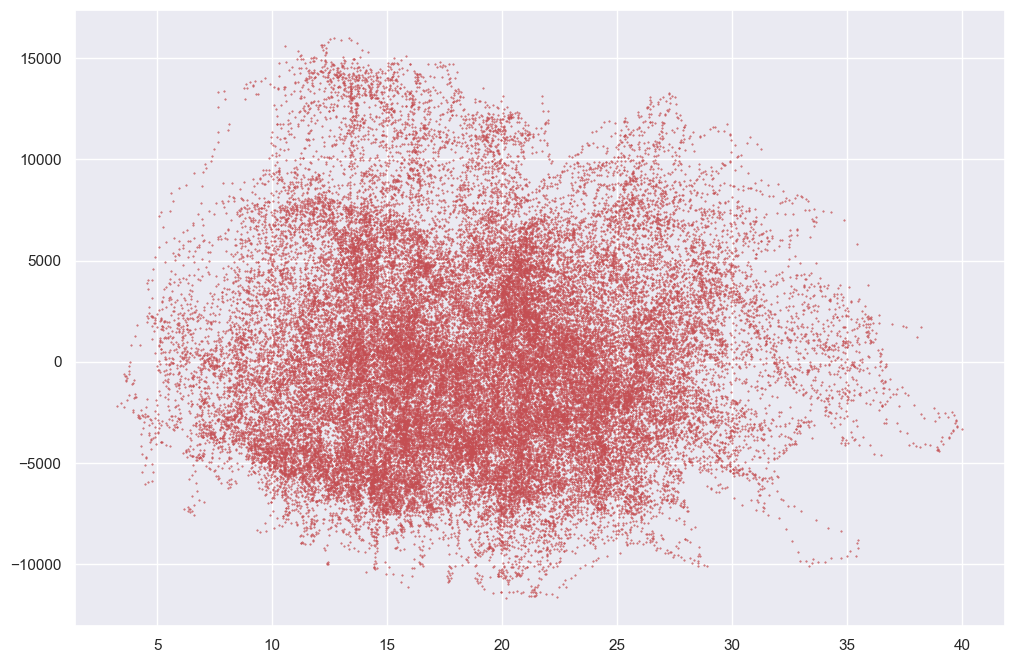

In [306]:
las2 = lasmodel(df, 'Zone_2_Power_Consumption')
las2_plot = las2.residual_plot4()
las2 = las2.pre_processing()
models["Lasso Reg"] = las2.fit_pred_acc()

plt.figure()
plt.scatter(df["Temperature"],las2_plot,c="r",s=0.2)

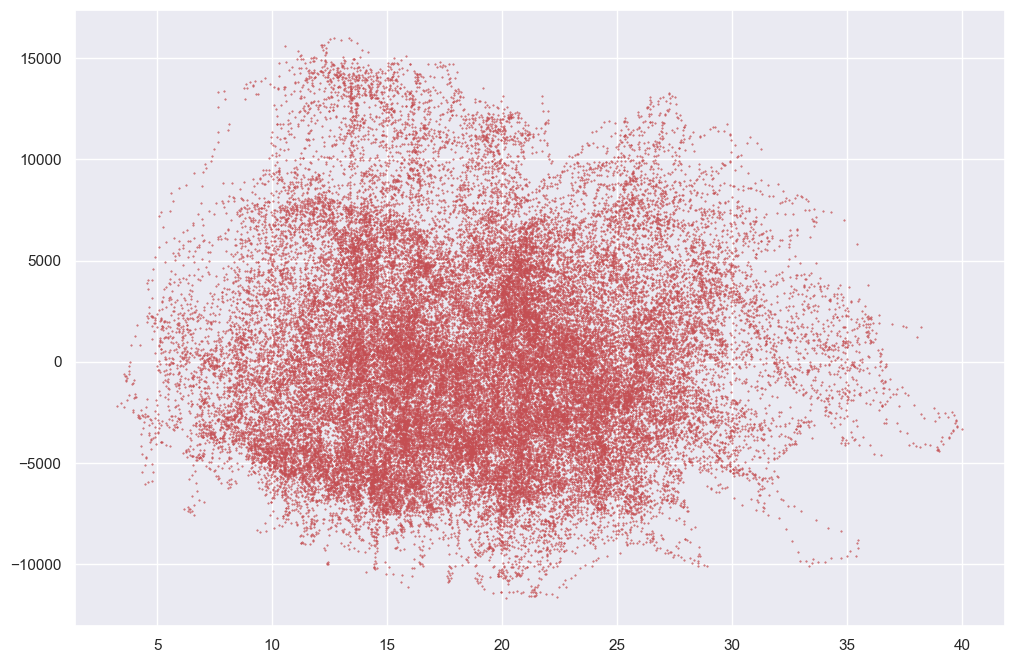

In [307]:
rdg2 = rdgmodel(df, 'Zone_2_Power_Consumption')
rdg2_plot = rdg2.residual_plot5()
rdg2 = rdg2.pre_processing()
models["Ridge Reg"] = rdg2.fit_pred_acc()

plt.figure()
plt.scatter(df["Temperature"],rdg2_plot,c="r",s=0.2)

In [308]:
models_df2 = pd.DataFrame.from_dict(models, orient='index',
                  columns=['RMSE'])
models_df2.sort_values(by=['RMSE'])

RMSE
Poly Reg           4653.90
Random Forest Reg  4714.06
Mult. Reg          4749.62
Ridge Reg          4749.62
Lasso Reg          4753.41

### ZONE 3 ###

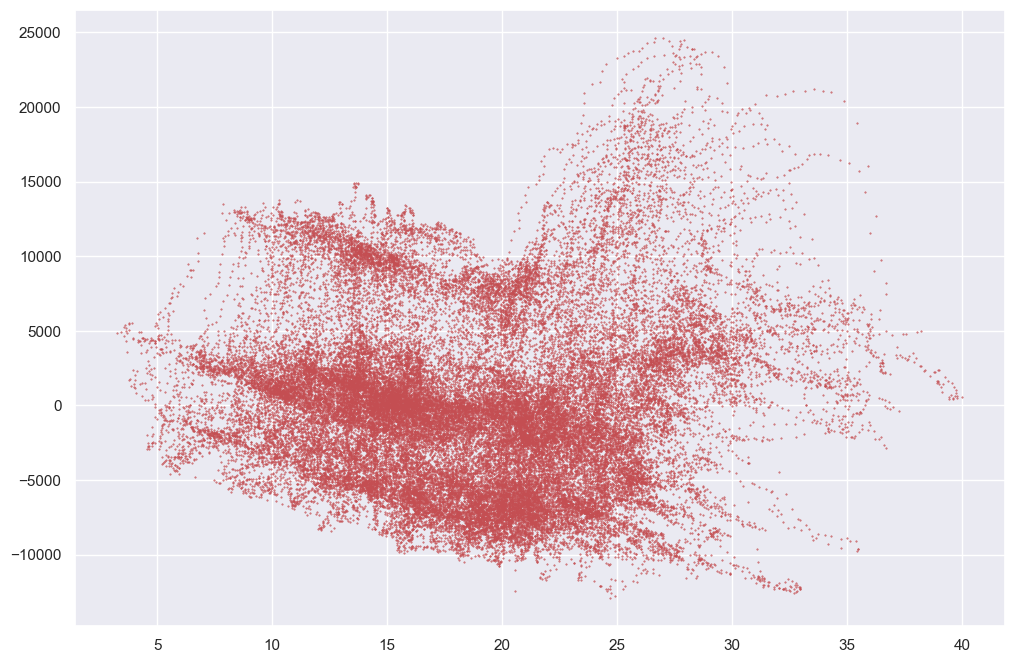

In [309]:
lin3 = linmodel(df, 'Zone_3_Power_Consumption')
lin3_plot = lin3.residual_plot1()
lin3 = lin3.pre_processing()
models["Mult. Reg"] = lin3.fit_pred_acc()

plt.figure()
plt.scatter(df["Temperature"],lin3_plot,c="r",s=0.2)

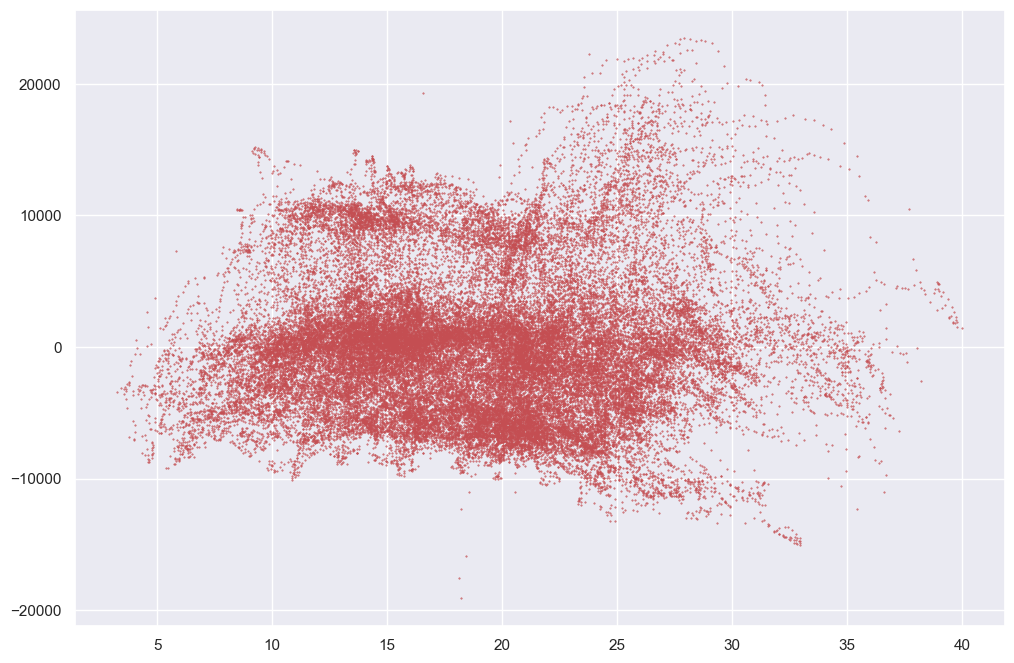

In [310]:
poly3 = polymodel(df, 'Zone_3_Power_Consumption')
poly3_plot = poly3.residual_plot2()
poly3 = poly3.pre_processing()
models["Poly Reg"] = poly3.fit_pred_acc()

plt.figure()
plt.scatter(df["Temperature"],poly3_plot,c="r",s=0.2)

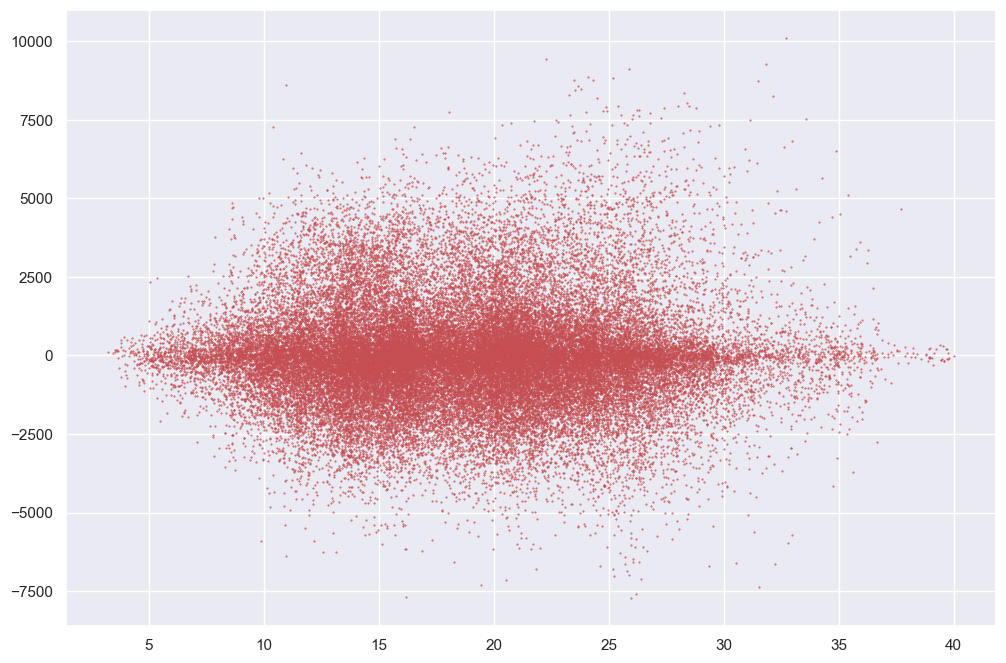

In [311]:
rand3 = randomforestmodel(df, 'Zone_3_Power_Consumption')
rand3_plot = rand3.residual_plot3()
rand3 = rand3.pre_processing()
models["Random Forest Reg"] = rand3.fit_pred_acc()

plt.figure()
plt.scatter(df["Temperature"],rand3_plot,c="r",s=0.2)

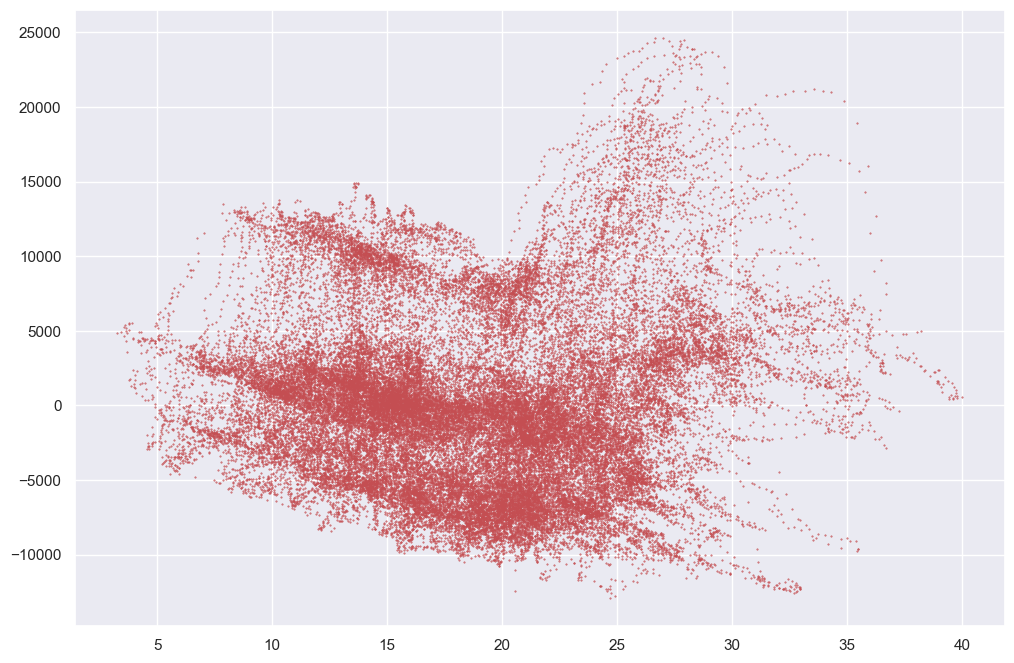

In [312]:
las3 = lasmodel(df, 'Zone_3_Power_Consumption')
las3_plot = las3.residual_plot4()
las3 = las3.pre_processing()
models["Lasso Reg"] = las3.fit_pred_acc()

plt.figure()
plt.scatter(df["Temperature"],las3_plot,c="r",s=0.2)

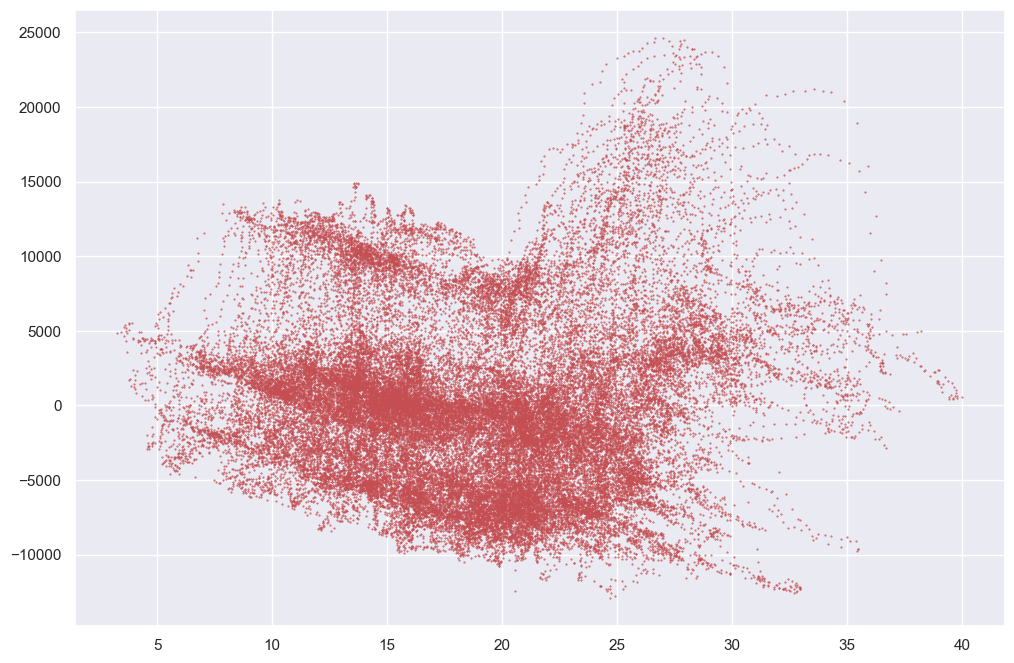

In [313]:
rdg3 = rdgmodel(df, 'Zone_3_Power_Consumption')
rdg3_plot = rdg3.residual_plot5()
rdg3 = rdg3.pre_processing()
models["Ridge Reg"] = rdg3.fit_pred_acc()

plt.figure()
plt.scatter(df["Temperature"],rdg3_plot,c="r",s=0.2)

In [314]:
models_df3 = pd.DataFrame.from_dict(models, orient='index',
                  columns=['RMSE'])
models_df3.sort_values(by=['RMSE'])

RMSE
Random Forest Reg  5414.68
Poly Reg           5429.65
Lasso Reg          5740.51
Mult. Reg          5782.64
Ridge Reg          5782.64

## Build an interface to allow users to add observations to the underlying database, and automatically update the data model to incorporate the new observations ##

In [346]:
def add_observations():
    
    global df
    df = pd.read_csv('Tetuan City power consumption.csv')
    df.columns = df.columns.str.replace(' ','_')
    models1={}
    s=float(input("Enter the value of Temperature: "))

    p=float(input("Enter the value of Humidity: "))

    q=float(input("Enter the value of Wind Speed: "))

    r=float(input("Zone_1_Power_Consumption: "))

    t=float(input("Zone_2_Power_Consumption: "))

    l=float(input("Zone_3_Power_Consumption: "))

    o=input("Datetime: ")

    df2 = {'DateTime': o, 'Temperature': s, 'Humidity': p, 'Wind_Speed': q,'Zone_1_Power_Consumption':r,'Zone_2_Power_Consumption':t,'Zone_3_Power_Consumption':l}
    df = df.append(df2, ignore_index = True)
    

    poly1 = polymodel(df, 'Zone_1_Power_Consumption')
    poly1 = poly1.pre_processing()
    models1["Polynomial Regression for zone 1"] = poly1.fit_pred_acc()


    poly2 = polymodel(df, 'Zone_2_Power_Consumption')
    poly2 = poly2.pre_processing()
    models1["Polynomial Regression for zone 2"] = poly2.fit_pred_acc()


    rand2 = randomforestmodel(df, 'Zone_3_Power_Consumption')
    rand2 = rand2.pre_processing()
    models1["Random Forest Regression for zone 3"] = rand2.fit_pred_acc()


    models_df2 = pd.DataFrame.from_dict(models1, orient='index',
                      columns=['RMSE'])
    
    return models_df2

In [347]:
add_observations()

Enter the value of Temperature: 1
Enter the value of Humidity: 2
Enter the value of Wind Speed: 3
Zone_1_Power_Consumption: 4
Zone_2_Power_Consumption: 3
Zone_3_Power_Consumption: 2
Datetime: 1


RMSE
Polynomial Regression for zone 1     6255.05
Polynomial Regression for zone 2     4644.13
Random Forest Regression for zone 3  5433.40

In [348]:
df

DateTime  Temperature  Humidity  Wind_Speed  \
0         1/1/17 0:00        6.559      73.8       0.083   
1         1/1/17 0:10        6.414      74.5       0.083   
2         1/1/17 0:20        6.313      74.5       0.080   
3         1/1/17 0:30        6.121      75.0       0.083   
4         1/1/17 0:40        5.921      75.7       0.081   
...               ...          ...       ...         ...   
52412  12/30/17 23:20        6.947      72.6       0.082   
52413  12/30/17 23:30        6.900      72.8       0.086   
52414  12/30/17 23:40        6.758      73.0       0.080   
52415  12/30/17 23:50        6.580      74.1       0.081   
52416               1        1.000       2.0       3.000   

       Zone_1_Power_Consumption  Zone_2_Power_Consumption  \
0                   34055.69620               16128.87538   
1                   29814.68354               19375.07599   
2                   29128.10127               19006.68693   
3                   28228.86076               18361.09422   
4                   27335.69620               17872.34043   
...                         ...                       ...   
52412               30430.41825               26124.57809   
52413               29590.87452               25277.69254   
52414               28958.17490               24692.23688   
52415               28349.80989               24055.23167   
52416                   4.00000                   3.00000   

       Zone_3_Power_Consumption  
0                   20240.96386  
1                   20131.08434  
2                   19668.43373  
3                   18899.27711  
4                   18442.40964  
...                         ...  
52412               14428.81152  
52413               13806.48259  
52414               13512.60504  
52415               13345.49820  
52416                   2.00000  

[52417 rows x 7 columns]

## Build an interface to allow users to enter input parameters and return an estimated power consumption ##

In [317]:
def Power_consumption_estimation():
    class Power_consumption_estimation1():

        global a,b,c
        a=float(input("Please input Temperature: "))
        b=float(input("Please input Humidity: "))
        c=float(input("Please input Wind Speed: "))

        def __init__(self, df, target):
            self.df = df
            self.target = target

        def pre_processing(self):
            cat = ['DateTime', 'Zone_1_Power_Consumption','Zone_2_Power_Consumption','Zone_3_Power_Consumption']
            X = self.df.drop(cat+[self.target], axis=1).values
            Y = self.df[self.target].values

            self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(X, Y, 
                                                                    test_size = 0.333333, 
                                                                     random_state = 42)

            return self

        def Zone1(self):

            reg = LinearRegression(normalize=True)
            pol_feat = PolynomialFeatures(2)
            X_train_transf = pol_feat.fit_transform(self.X_train)
            new_input = pol_feat.fit_transform([[a,b,c]])
            model = reg.fit(X_train_transf,self.Y_train)
            new_output = model.predict(new_input)
            print("The estimated power consumption for zone 1 is:",float(new_output))


            return [new_output]

        def Zone2(self):
            reg = LinearRegression(normalize=True)
            pol_feat = PolynomialFeatures(2)
            X_train_transf = pol_feat.fit_transform(self.X_train)
            new_input = pol_feat.fit_transform([[a,b,c]])
            model = reg.fit(X_train_transf,self.Y_train)
            new_output = model.predict(new_input)
            print("The estimated power consumption for zone 2 is:",float(new_output))

            return [new_output]

        def Zone3(self):
            reg = RandomForestRegressor(max_depth=2)
            pol_feat = PolynomialFeatures(2)
            X_train_transf = pol_feat.fit_transform(self.X_train)
            new_input = pol_feat.fit_transform([[a,b,c]])
            model = reg.fit(X_train_transf, self.Y_train)
            new_output= model.predict(new_input)
            print("The estimated power consumption for zone 3 is:",float(new_output))

            return [new_output]
    predict1 = Power_consumption_estimation1(df, 'Zone_1_Power_Consumption')
    predict1 = predict1.pre_processing()
    output1 = predict1.Zone1()

    predict2 = Power_consumption_estimation1(df, 'Zone_2_Power_Consumption')
    predict2 = predict2.pre_processing()
    output2 = predict2.Zone2()

    predict3 = Power_consumption_estimation1(df, 'Zone_3_Power_Consumption')
    predict3 = predict3.pre_processing()
    output3 = predict3.Zone3()        

In [ ]:
def fit_pred_acc(self):
        reg = LinearRegression(normalize=True)
        pol_feat = PolynomialFeatures(2)
        X_train_transf = pol_feat.fit_transform(self.X_train)
        X_test_transf = pol_feat.fit_transform(self.X_test)
        model = reg.fit(X_train_transf, self.Y_train)
        pred = model.predict(X_test_transf)
        rmse = round(skm.mean_squared_error(self.Y_test, pred, squared=False), 2)
      
        return [rmse]

In [321]:
Power_consumption_estimation()

Please input Temperature: 12.5
Please input Humidity: 71
Please input Wind Speed: 0.073
The estimated power consumption for zone 1 is: 29805.233237187356
The estimated power consumption for zone 2 is: 19850.995328103498
The estimated power consumption for zone 3 is: 15771.083306670229


In [322]:
Power_consumption_estimation()

Please input Temperature: 21.8
Please input Humidity: 85.2
Please input Wind Speed: 0.068
The estimated power consumption for zone 1 is: 34046.526615587674
The estimated power consumption for zone 2 is: 21339.68689238238
The estimated power consumption for zone 3 is: 19034.334374770315


In [323]:
Power_consumption_estimation()

Please input Temperature: 17.9
Please input Humidity: 54
Please input Wind Speed: 0.083
The estimated power consumption for zone 1 is: 32877.2850715375
The estimated power consumption for zone 2 is: 21570.034327443347
The estimated power consumption for zone 3 is: 15757.58650334286
